# Data Science Engg. Methods & Tools - Final Project

# Diabetes Prediction

## Report Summary

#### 1. Importing Python Libraries

#### 2. Reading the dataset

#### 3. Basic Data Analysis

* Understanding basic stats about the dataset

#### 4. Exploratory Data Analysis

* Pie chart for categorical data
* Histogram for all features
* Box plots
* Correlation Heatmap

#### 5. Data Preparation and Encoding

* Checking of NaN values
* Encoding Smoking_history Feature using LabelEncoder
* Removing Outliers
* Encoding Gender Feature using One Hot Encoding
* Checking duplicate rows and removing them

#### 6. Training and Testing the model - including their Feature importance

* Naive Bayes
* Decision Tree
* Random Forest
* Feature Importance
* HyperParameter Tuning
  

#### 7. Conclusion

* Comparison of algorithms and its accuracy
* Conclusion summary

Dataset : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data

Streamlit Github: https://github.com/gayatridt/datascience  
Application: https://datascience-project.streamlit.app

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score , roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')
import imblearn
from collections import Counter
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE

## Reading the dataset

In [2]:
df = pd.DataFrame(pd.read_csv("C:/Users/Keerthana/Downloads/dia/diabetes_prediction_dataset.csv"))
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The dataset contains 100,000 records with 9 columns.
Each row represents an individual patient.

The columns include:
1. Gender: Categorical variable indicating the gender of the patient (Male/Female/Other).
2. Age: Continuous variable representing the age of the patient.
3. Hypertension: Binary variable indicating the presence of hypertension (0: No, 1: Yes).
4. Heart Disease: Binary variable indicating the presence of heart disease (0: No, 1: Yes).
5. Smoking History: Categorical variable indicating the smoking history of the patient (never/current/former/No Info).
6. BMI: Continuous variable representing the Body Mass Index (BMI) of the patient.
7. HbA1c Level: Continuous variable representing the HbA1c level of the patient.
8. Blood Glucose Level: Continuous variable representing the blood glucose level of the patient.
9. Diabetes: Binary variable indicating the presence of diabetes (0: No, 1: Yes).

## Basic Data Analysis 



In [3]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df.shape

(100000, 9)

In [5]:
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [6]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Age Distribution: The dataset contains individuals with ages ranging from 0.08 to 80 years, with a mean age of approximately 41.89 years and a standard deviation of around 22.52. Most individuals fall within the age range of 24 to 60 years. <br>

Hypertension and Heart Disease: The prevalence of hypertension and heart disease is relatively low, with means of approximately 0.075 and 0.039, respectively. These columns represent binary variables indicating the presence (1) or absence (0) of the condition.<br>

Body Mass Index (BMI): The mean BMI in the dataset is approximately 27.32, with a standard deviation of around 6.64. BMI values range from 10.01 to 95.69, reflecting a wide variability in body weight status among individuals.<br>

HbA1c Level and Blood Glucose Level: The mean HbA1c level is approximately 5.53, and the mean blood glucose level is approximately 138.06. Both HbA1c and blood glucose levels show relatively low variability, as indicated by their standard deviations.<br>

Diabetes Prevalence: The dataset has a low prevalence of diabetes, with a mean of approximately 0.085. This suggests that only a small proportion of individuals in the dataset have been diagnosed with diabetes.

In [8]:
# Checking unique values 
def get_unique_values(dataframe,col_list):
    for col in col_list:
        print('Column:',col)
        print('Unique values:',dataframe[col].unique())
        print('\n')
get_unique_values(df,['gender','age','hypertension','heart_disease','smoking_history','diabetes'])

Column: gender
Unique values: ['Female' 'Male' 'Other']


Column: age
Unique values: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]


Column: hypertension
Unique values: [0 1]


Column: heart_disease
Unique values: [1 0]


Column: smoking_history
Unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


Column: diabetes
Unique values: [0 1]




## Exploratory Data Analysis  

### Pie chart for Categorical Data

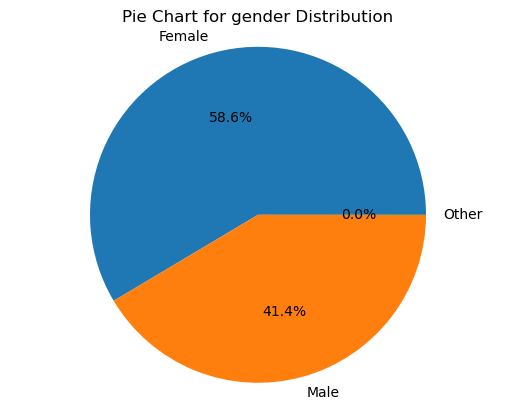

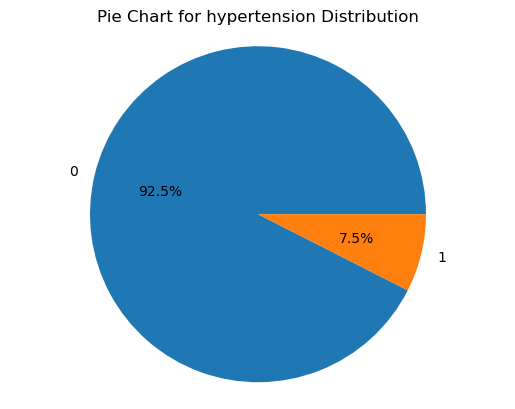

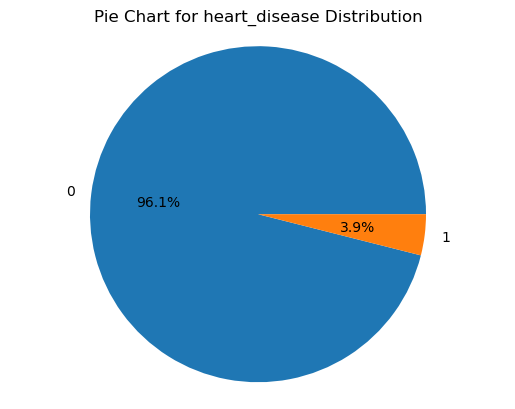

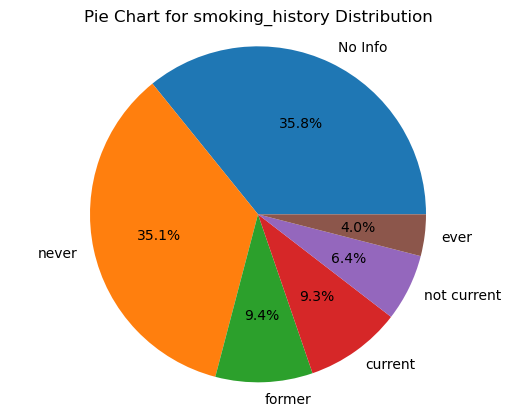

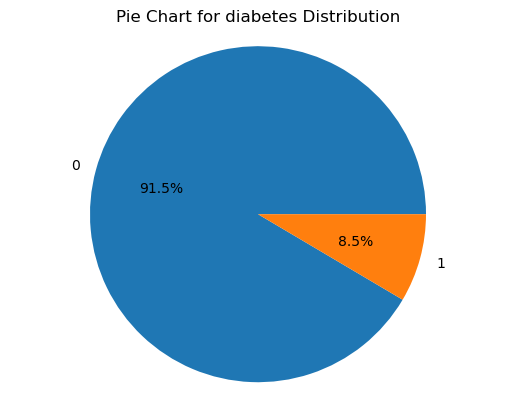

In [9]:
df_eda_pie = df[['gender','hypertension','heart_disease','smoking_history','diabetes']]
for a in df_eda_pie.columns:
    plt.pie(df_eda_pie[a].value_counts(),labels = df_eda_pie[a].value_counts().index,autopct='%1.1f%%')
    plt.title(f'Pie Chart for {a} Distribution')
    plt.axis('equal')  
    plt.show()

### Observation
Pie charts are effective for visualizing the distribution of categorical variables. 
They display the proportion of each category within the dataset, making it easy to identify the most common categories and any imbalances in the data.

Gender: distribution in the dataset is predominantly female, accounting for 58.6% of the individuals. Male individuals make up 41.4% of the dataset.

Hypertension: Approximately 92.5% of individuals in the dataset do not have hypertension (labeled as 0).
About 7.5% of individuals have hypertension (labeled as 1).

Heart disease: Around 96.1% of individuals in the dataset do not have heart disease (labeled as 0).
Approximately 3.9% of individuals have heart disease (labeled as 1).

Smoking history distribution:
About 9.3% of individuals are current smokers.
Approximately 9.4% of individuals are former smokers.
Around 6.4% of individuals have a smoking history but are not current smokers.
About 4.0% of individuals have ever smoked.
About 35.1% of individuals have never smoked.
Approximately 35.8% of individuals have no information available regarding their smoking history.

Diabetes: Approximately 91.5% of individuals in the dataset do not have diabetes (labeled as 0).
Around 8.5% of individuals have diabetes (labeled as 1).

### Histogram 

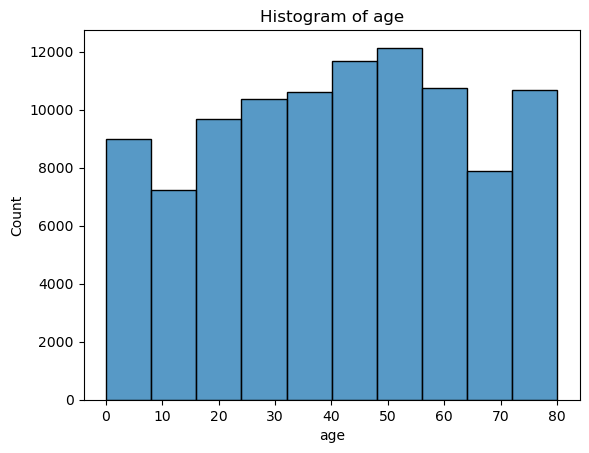

<Figure size 500x500 with 0 Axes>

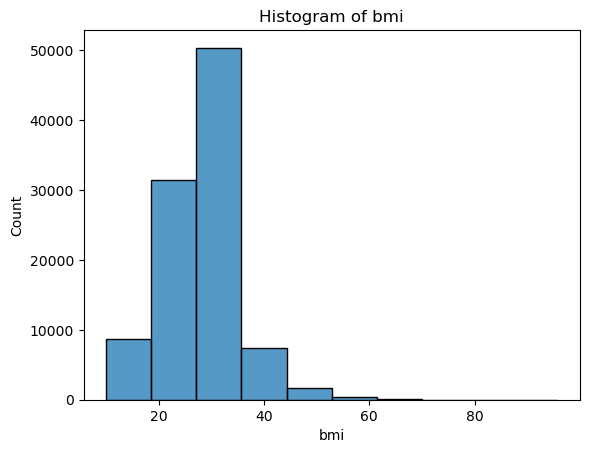

<Figure size 500x500 with 0 Axes>

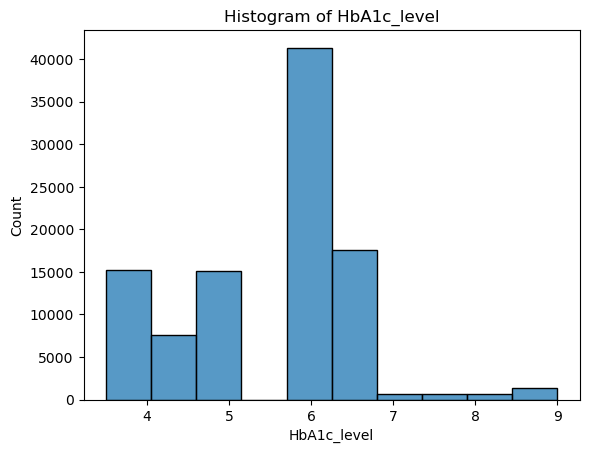

<Figure size 500x500 with 0 Axes>

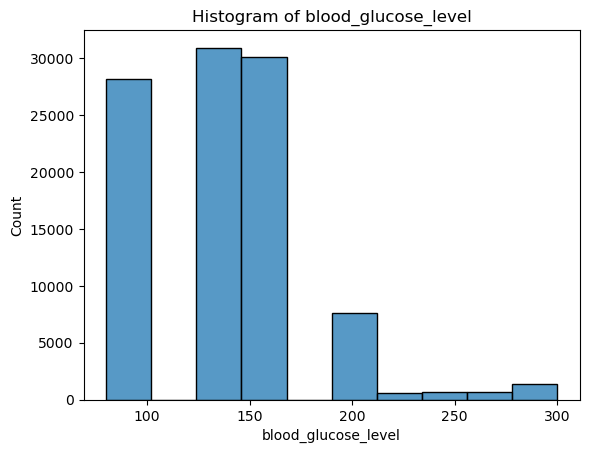

<Figure size 500x500 with 0 Axes>

In [10]:
df_eda_hist = df[['age','bmi','HbA1c_level','blood_glucose_level']]
for a in df_eda_hist :
    sns.histplot(df_eda_hist[a],bins=10)
    plt.title(f'Histogram of {a}')
    plt.figure(figsize=(5, 5)) 
    plt.tight_layout()
    plt.show()

### Observation

Histogram is providing valuable insights into the distribution of continuious numerical variables with columns such as age,bmi,HbA1c_level and blood_glucose_level

1.We can come to conclusion that age feature is symmetricial enough with data above and below 40 being equally distributed with multiple modes. 

2.BMI feature seems to be left skewed as the the distribution on the left side sees to be more than the right side. 

3.HbA1c_Level feature seems to be right skewed with highest mode for 6 range value with 400000 records and furthermore.

4.Blood Glucose also has right skewed data as 30000 having glucode ranges from 100 -150 range and in the consequitive range achieves the second largest modal count with 29000.


### Box Plot

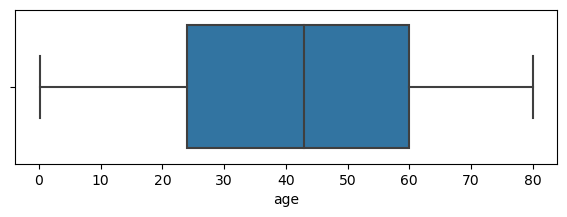

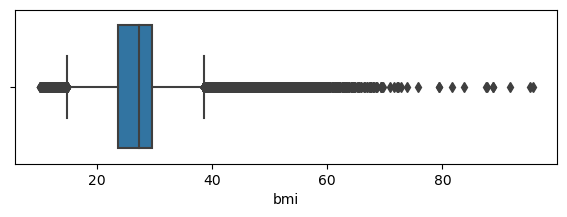

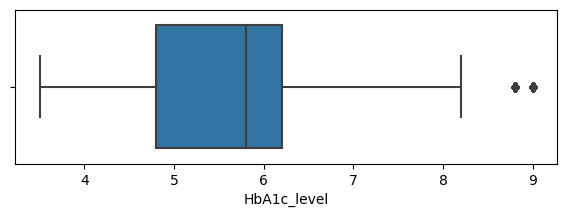

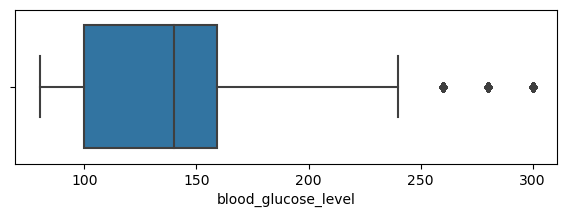

In [11]:
df_eda_box = df.drop(['diabetes','hypertension','heart_disease','gender','smoking_history'], axis=1)
for column in df_eda_box.columns:
    fig, ax = plt.subplots(figsize=(7, 2))
    sns.boxplot(x=df_eda_box[column], ax=ax)
    plt.show()


### Observation

The presence of outliers is maximum for BMI followed by blood_glucose_level , and HbA1c_level whereas age does not have any outliers.

### Correlation

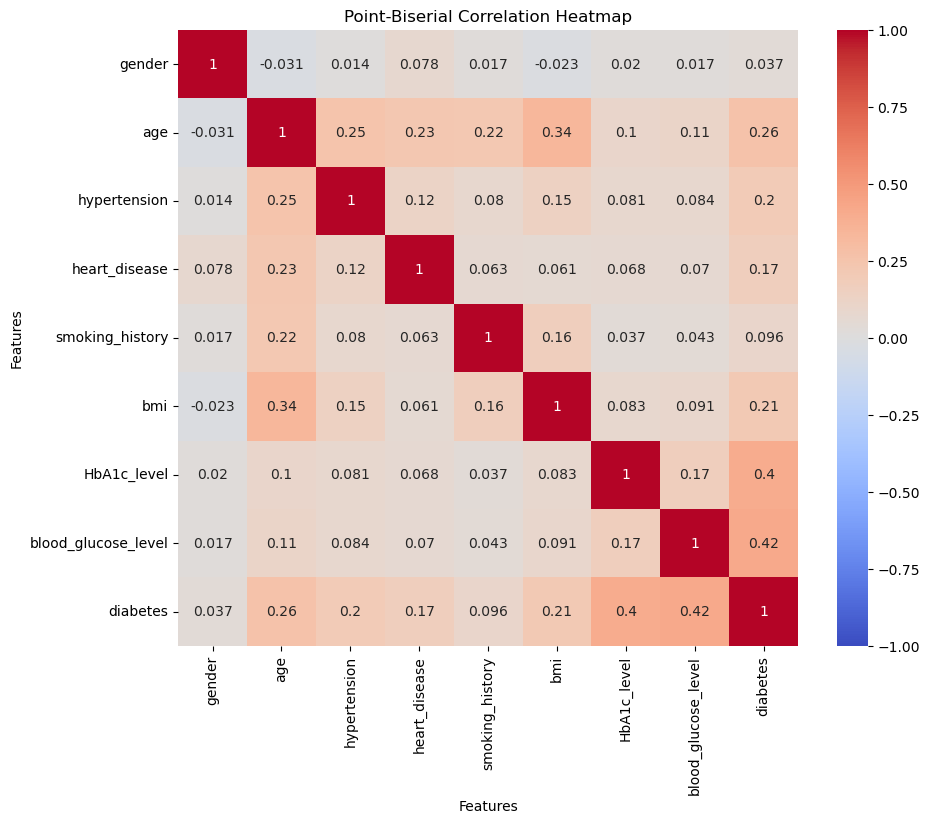

In [4]:
df_eda_corr=df.copy()


#Certain changes in columns
df_eda_corr['blood_glucose_level'] = df_eda_corr['blood_glucose_level'].astype(float)
df_eda_corr['gender'] = df_eda_corr['gender'].map({'Female':0,'Male':1, 'Other':2})
df_eda_corr['smoking_history'] = df_eda_corr['smoking_history'].map({'No Info':0,'never':1, 'ever':2,'former':3, 'not current':4 , 'current':5})
 
numColumns = ['age','bmi','HbA1c_level','blood_glucose_level']
catColumns = ['gender','hypertension','heart_disease','smoking_history','diabetes']

allFeatures = [ 'gender','age', 'hypertension', 'heart_disease' ,'smoking_history','bmi','HbA1c_level', 'blood_glucose_level','diabetes']

# Point-biserial correlations for all pairs of features
correlation_matrix = pd.DataFrame(index=allFeatures, columns=allFeatures)

for feature1 in allFeatures:
    for feature2 in allFeatures:
        correlation, _ = pointbiserialr(df_eda_corr[feature1], df_eda_corr[feature2])
        correlation_matrix.loc[feature1, feature2] = correlation

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Point-Biserial Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Observation
The point-biserial correlation is used to measure the association between a binary (categorical) variable and a continuous (numeric) variable. 

Correlation Coefficients: The heatmap displays the correlation coefficients between various pairs of features. These coefficients range from -1 to 1:
A coefficient near 1 signals a strong positive relationship, coefficient near -1 indicates a strong negative relationship, coefficient close to 0 implies a weak or no correlation, suggesting the features are mostly independent.

Higher absolute correlations with diabetes point to greater predictive power for those features.

## Data Preparation 

### Checking of Nan Values

In [13]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


#### Observation:

There seems to be no null values in this dataset.

### Encoding Smoking_history Feature using LabelEncoder

In [3]:
label_encoder = LabelEncoder()

# Fitting the LabelEncoder to the smoking_history column
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df['smoking_history']


0        4
1        0
2        4
3        1
4        1
        ..
99995    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 100000, dtype: int32

We used label encoding to convert the categorical values in the "smoking history" column to numerical ones because there appears to be a correlation or ordinality among the values ['never', 'No Info', 'current', 'former', 'ever', 'not current'].

### Removal of Outliers

Since BMI feature had lot of outliers , we are removing some for that particular feature

In [4]:
threshold = 1.5
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['bmi'] < (Q1 - (threshold * IQR)))| (df['bmi'] > (Q3 + (threshold * IQR)))]
df = df.drop(outliers.index)
df.reset_index(drop=True, inplace=True)
print('The removal of outliers for the bmi column is done.')

The removal of outliers for the bmi column is done.


In [16]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,4,25.19,6.6,140,0
1,Female,54.0,0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,4,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
92909,Female,80.0,0,0,0,27.32,6.2,90,0
92910,Female,2.0,0,0,0,17.37,6.5,100,0
92911,Male,66.0,0,0,3,27.83,5.7,155,0
92912,Female,24.0,0,0,4,35.42,4.0,100,0


### Encoding Gender Feature using One Hot Encoding

In [5]:
df = pd.get_dummies(df, columns=['gender'])
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,4,25.19,6.6,140,0,True,False,False
1,54.0,0,0,0,27.32,6.6,80,0,True,False,False
2,28.0,0,0,4,27.32,5.7,158,0,False,True,False
3,36.0,0,0,1,23.45,5.0,155,0,True,False,False
4,76.0,1,1,1,20.14,4.8,155,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
92909,80.0,0,0,0,27.32,6.2,90,0,True,False,False
92910,2.0,0,0,0,17.37,6.5,100,0,True,False,False
92911,66.0,0,0,3,27.83,5.7,155,0,False,True,False
92912,24.0,0,0,4,35.42,4.0,100,0,True,False,False


We chose one-hot encoding for the gender values because there is no inherent order among them.

### Looking out for duplicated rows and removing them 

In [6]:
# Checking Duplicated rows
df.loc[df.duplicated()]

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
2563,80.0,0,0,0,27.32,6.6,159,0,False,True,False
3051,80.0,0,0,0,27.32,3.5,80,0,True,False,False
3184,19.0,0,0,0,27.32,6.5,100,0,True,False,False
3669,78.0,1,0,3,27.32,3.5,130,0,True,False,False
3686,47.0,0,0,0,27.32,6.0,200,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
92895,52.0,0,0,4,27.32,6.1,145,0,True,False,False
92900,25.0,0,0,0,27.32,5.8,145,0,False,True,False
92904,26.0,0,0,0,27.32,5.0,158,0,True,False,False
92905,39.0,0,0,0,27.32,6.1,100,0,False,True,False


In [7]:
df = df.drop_duplicates()
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,4,25.19,6.6,140,0,True,False,False
1,54.0,0,0,0,27.32,6.6,80,0,True,False,False
2,28.0,0,0,4,27.32,5.7,158,0,False,True,False
3,36.0,0,0,1,23.45,5.0,155,0,True,False,False
4,76.0,1,1,1,20.14,4.8,155,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
92908,36.0,0,0,0,24.60,4.8,145,0,True,False,False
92910,2.0,0,0,0,17.37,6.5,100,0,True,False,False
92911,66.0,0,0,3,27.83,5.7,155,0,False,True,False
92912,24.0,0,0,4,35.42,4.0,100,0,True,False,False


## Training and Testing the Model

In [8]:
# Setting input and output variables
y = df['diabetes'] #Output
x = df.drop(columns=['diabetes']) #Input  
y

0        0
1        0
2        0
3        0
4        0
        ..
92908    0
92910    0
92911    0
92912    0
92913    0
Name: diabetes, Length: 89060, dtype: int64

## Class Imbalance

Here we are doing Synthetic Minority Oversampling Technique (SMOTE) to resample the lower value data, which included the individual with diabetes, because the target feature data was severely imbalanced. 

In [9]:
df['diabetes'].value_counts(normalize = True)

diabetes
0    0.921356
1    0.078644
Name: proportion, dtype: float64

In [10]:
imbalance = SMOTE()
x_new, y_new = imbalance.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_new))

Original dataset shape: Counter({0: 82056, 1: 7004})
Resample dataset shape Counter({0: 82056, 1: 82056})


In [11]:
#Creating Training and Testing Data 

X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=123)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [12]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


X_train:  (131289, 10)
X_test:  (32823, 10)
y_train:  (131289, 1)
y_test:  (32823, 1)


### Naive Bayes Model

In [12]:
# Instantiating , fitting and predicting the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

### Decision Tree Model

In [17]:
#Instantiating , fitting and predicting the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3,random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

### Random Forest Model

In [12]:
# Instantiating , fitting and predicting the Random Forest model
rf = RandomForestClassifier(random_state=42,max_depth=5)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

### XGBoost

In [15]:
from xgboost import XGBClassifier
# Instantiating, fitting and predicting the XGBoost model
xgb = XGBClassifier(random_state=42, max_depth=5, n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
 

## Performance Metrics

#### Accuracy:
Accuracy assesses the proportion of correctly classified samples among the total samples. It ranges from 0 to 1, with higher values indicating better performance.

#### Precision
Precision evaluates the proportion of true positive predictions among all predicted positives. It ranges from 0 to 1, with higher values signifying fewer false positive predictions.

#### Recall (Sensitivity):
Recall measures the proportion of true positive predictions among all actual positive samples. It ranges from 0 to 1, with higher values indicating fewer false negative predictions.

#### F1 Score:
The F1 score combines precision and recall as the harmonic mean, balancing the two metrics. It ranges from 0 to 1, with higher values indicating a better balance between precision and recall.

#### Confusion Matrix:
A confusion matrix is a visual representation of the classification model's performance by comparing predicted and actual class labels. The diagonal values represent correct predictions (true positives and true negatives), while off-diagonal values represent incorrect predictions (false positives and false negatives). An ideal confusion matrix features high diagonal values and low off-diagonal values, indicating accurate classification.

### Metrics for Naive Bayes

In [19]:
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

print("Naive Bayes Metrics:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")

Naive Bayes Metrics:
Accuracy: 0.818267678152515
Precision: 0.7411497239363429
Recall: 0.9764058679706602
F1 Score: 0.84266610397489


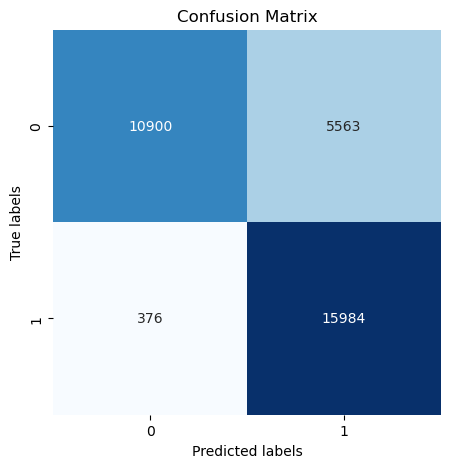

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, nb_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Metrics for Decision Tree

In [30]:
dt_accuracy = accuracy_score(y_test, dt_y_pred )
dt_precision = precision_score(y_test, dt_y_pred )
dt_recall = recall_score(y_test, dt_y_pred )
dt_f1 = f1_score(y_test, dt_y_pred )

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

Decision Tree Metrics:
Accuracy: 0.8461749383054565
Precision: 1.0
Recall: 0.6913814180929095
F1 Score: 0.8175346030139858


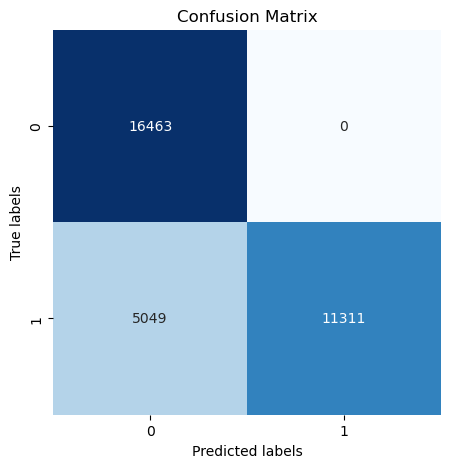

In [31]:
# Confusion matrix
dt_confusion = confusion_matrix(y_test, dt_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Metrics for Random Forest

Random Forest Metrics:
Accuracy : 0.9182585382201505
Precision : 0.9289343285454431
Recall : 0.9052567237163814
F1_Score : 0.916942698820543
Confusion Matrix : [[15330  1133]
 [ 1550 14810]]


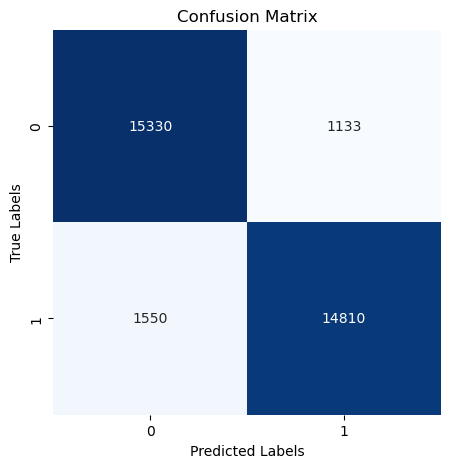

In [13]:
print("Random Forest Metrics:")
print(f'Accuracy : {accuracy_score(y_test , rf_y_pred)}')
print(f'Precision : {precision_score(y_test, rf_y_pred)}') 
print(f'Recall : {recall_score(y_test, rf_y_pred)}')     
print(f'F1_Score : {f1_score(y_test, rf_y_pred)}') 
print(f'Confusion Matrix : {confusion_matrix(y_test, rf_y_pred)}')
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Metrics for XGBoost

XGBoost Metrics:
Accuracy : 0.9686500319897633
Precision : 0.9900901476887667
Recall : 0.9465770171149144
F1_Score : 0.9678447548514109
Confusion Matrix : 
[[16308   155]
 [  874 15486]]


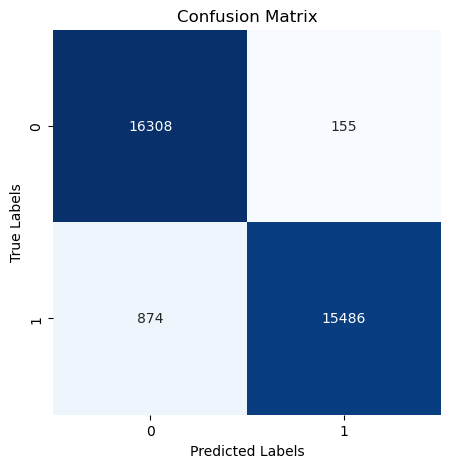

In [16]:
print("XGBoost Metrics:")
print(f'Accuracy : {accuracy_score(y_test, xgb_y_pred)}')
print(f'Precision : {precision_score(y_test, xgb_y_pred)}')
print(f'Recall : {recall_score(y_test, xgb_y_pred)}')
print(f'F1_Score : {f1_score(y_test, xgb_y_pred)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test, xgb_y_pred)}')
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Receiver Operating Characteristic (ROC) Curve

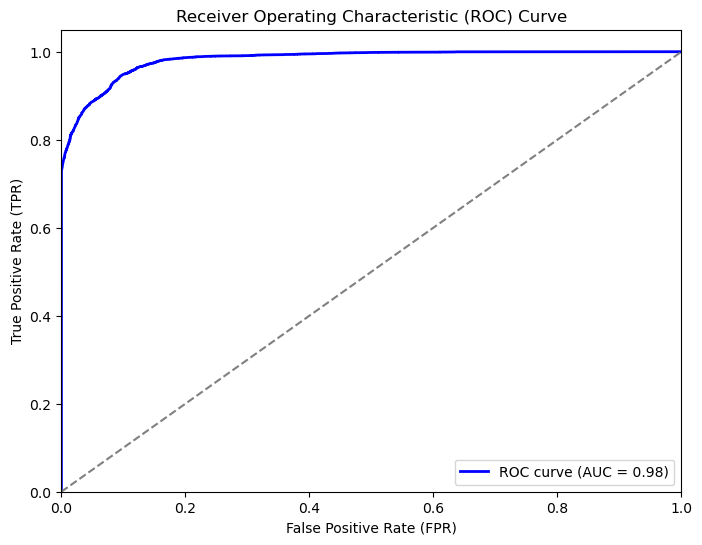

In [33]:
# Predict probabilities for positive class
y_pc = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pc)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Visualization of Tree

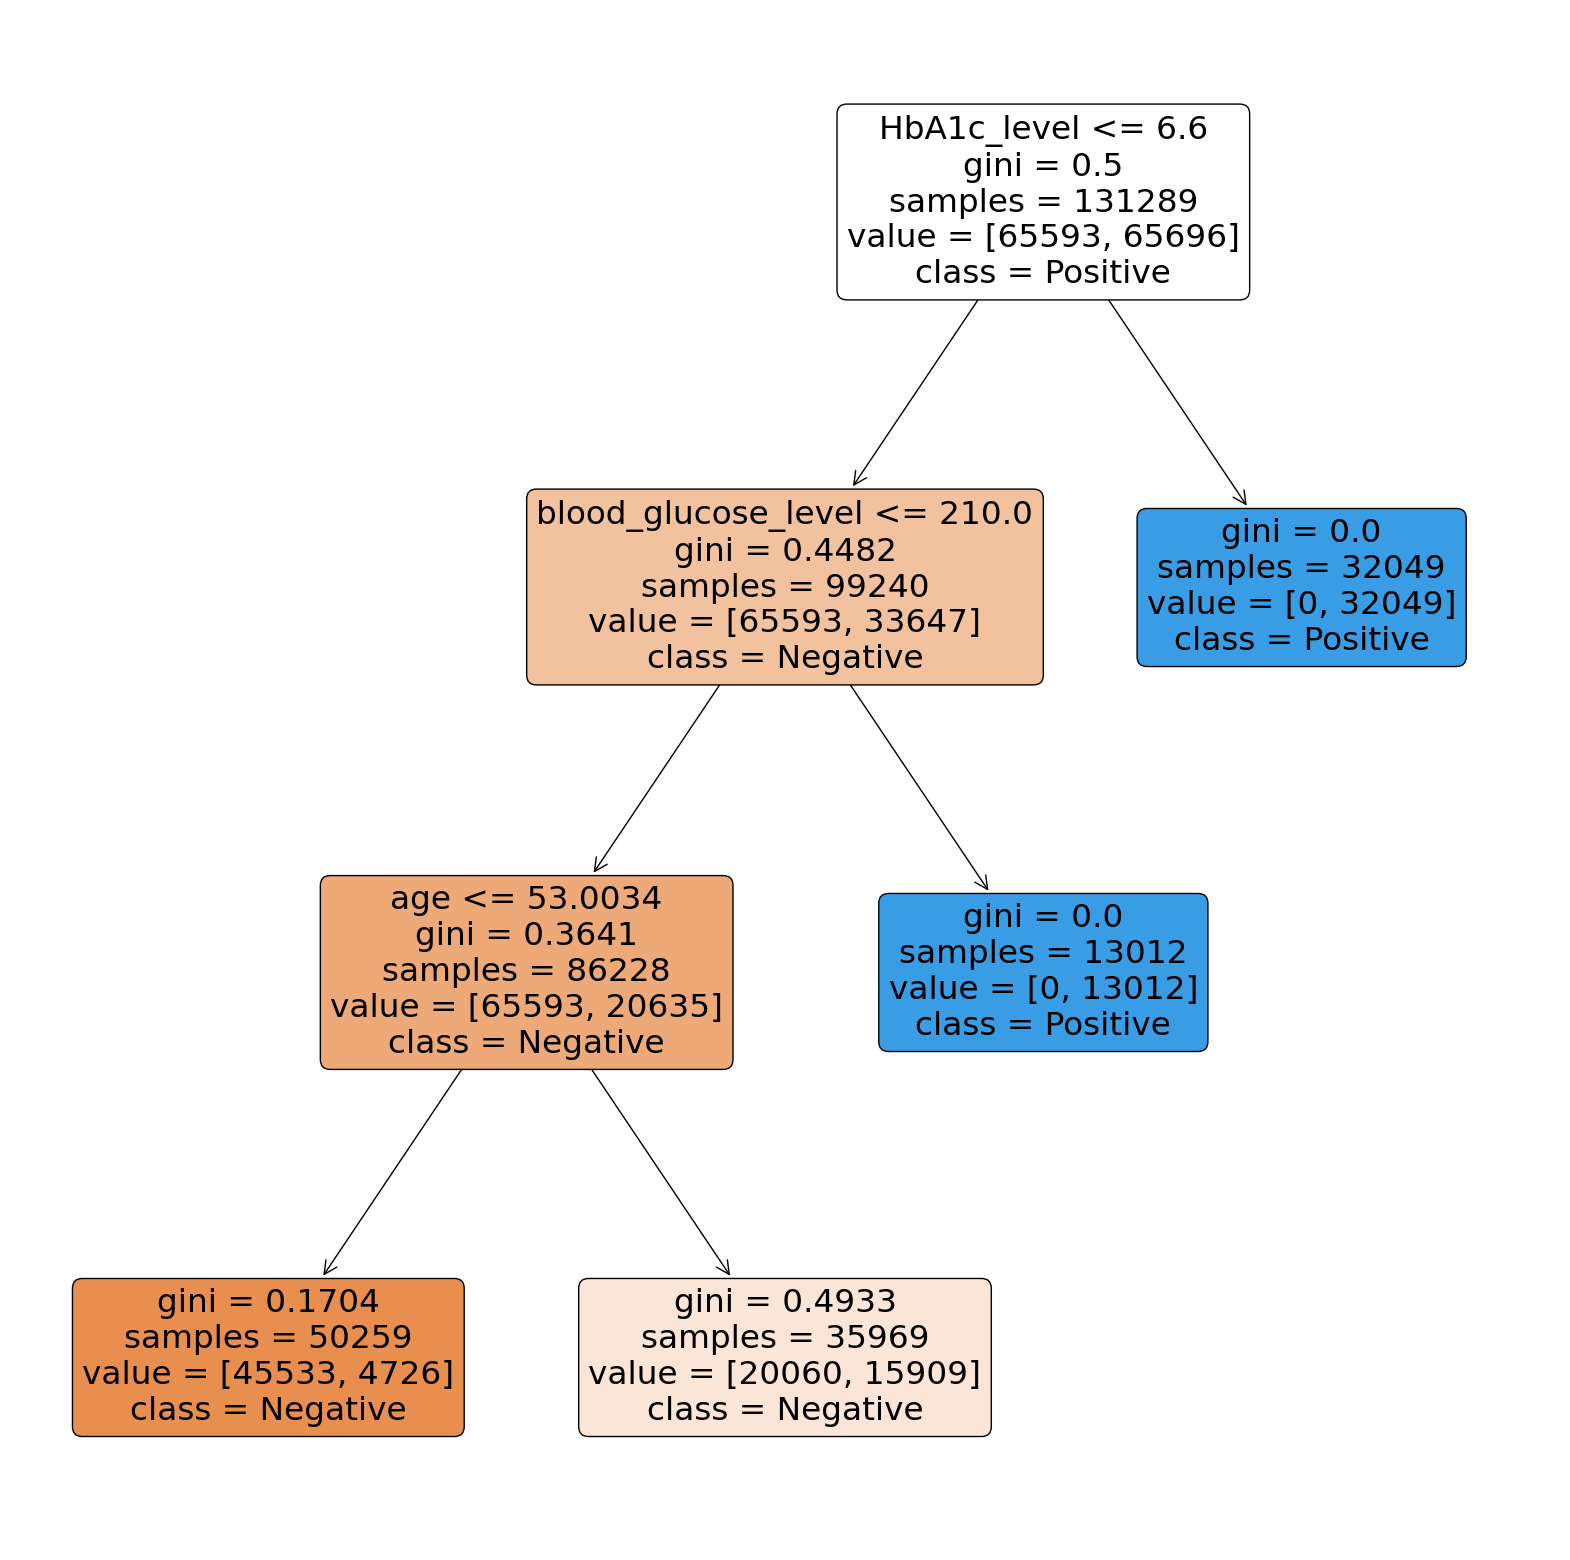

In [34]:
# Plotting the decision tree
plt.figure(figsize=(20, 20))
feature_names_list = x.columns.tolist()
plot_tree(dt_model, feature_names=feature_names_list, class_names=['Negative', 'Positive'], filled=True, precision=4, rounded=True)
plt.show()

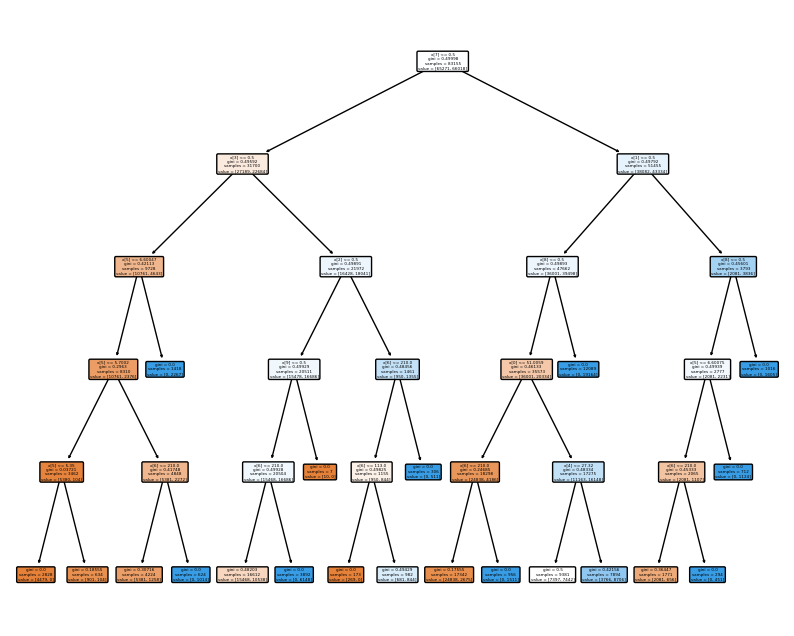

In [35]:
# Plotting of 4th tree from Random forest Classifier
plt.figure(figsize=(10, 8))
one_tree = rf.estimators_[4]
tree = plot_tree(decision_tree=one_tree, filled = True, precision = 5, rounded = True)

### Feature Importance 

##### Decision Tree

Feature Importance for the Decision Tree Model:
               Feature  Importance
5          HbA1c_level    0.538085
6  blood_glucose_level    0.332629
0                  age    0.129285
1         hypertension    0.000000
2        heart_disease    0.000000
3      smoking_history    0.000000
4                  bmi    0.000000
7        gender_Female    0.000000
8          gender_Male    0.000000
9         gender_Other    0.000000


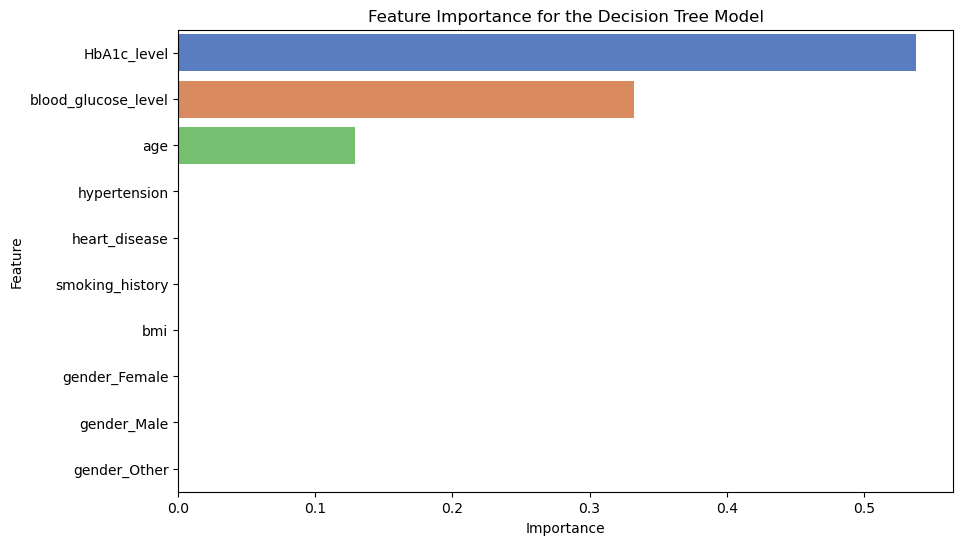

In [39]:
# feature importance from the trained decision tree model
dt_feature_importance = dt_model.feature_importances_
dt_feature_names = x_new.columns # columns from input data
feature_importance_df = pd.DataFrame({'Feature': dt_feature_names, 'Importance': dt_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance for the Decision Tree Model:")
print(feature_importance_df)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for the Decision Tree Model')
plt.show()

The feature importance for the Decision Tree model indicates that "HbA1c_level" and "blood_glucose_level" are the most important features for making predictions. These values represent the relative contribution of each feature to the decision-making process of the model."Age" has a minor impact on the model's predictions.

The other features such as "hypertension", "heart_disease", "smoking_history", "bmi", and gender-related features have importance scores of 0, suggesting that they did not significantly contribute to the decision-making process in this particular model.

##### Random Forest 

Feature Importance for the Decision Tree Model:
               Feature  Importance
5          HbA1c_level    0.443476
6  blood_glucose_level    0.284131
0                  age    0.159211
8          gender_Male    0.040965
4                  bmi    0.040061
7        gender_Female    0.020065
3      smoking_history    0.011610
1         hypertension    0.000426
2        heart_disease    0.000053
9         gender_Other    0.000002


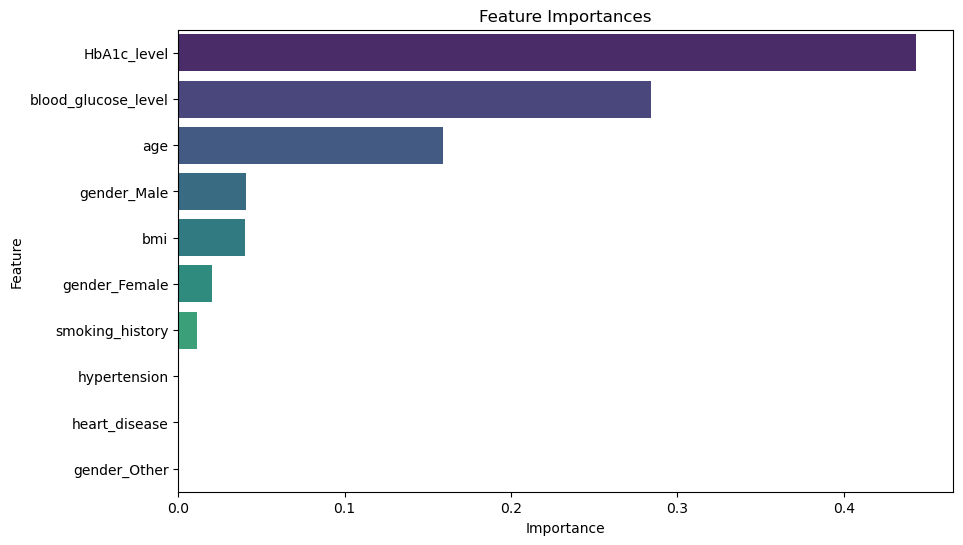

In [40]:
importance_1 = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance_1})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance for the Decision Tree Model:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The Random Forest Classifier identifies HbA1c level, blood glucose level, and age as the primary predictors for making accurate predictions, with respective importance scores of 3.882927e-01 , 3.351056e-01 and 1.759094e-01 . 
These scores denote the relative significance of each feature in influencing the model's decision-making process



##### XGBoost

Feature Importance for the XGBoost Model:
               Feature  Importance
5          HbA1c_level    0.332134
6  blood_glucose_level    0.267520
7        gender_Female    0.205380
0                  age    0.087050
8          gender_Male    0.061903
4                  bmi    0.027183
3      smoking_history    0.016353
1         hypertension    0.001869
2        heart_disease    0.000607
9         gender_Other    0.000000


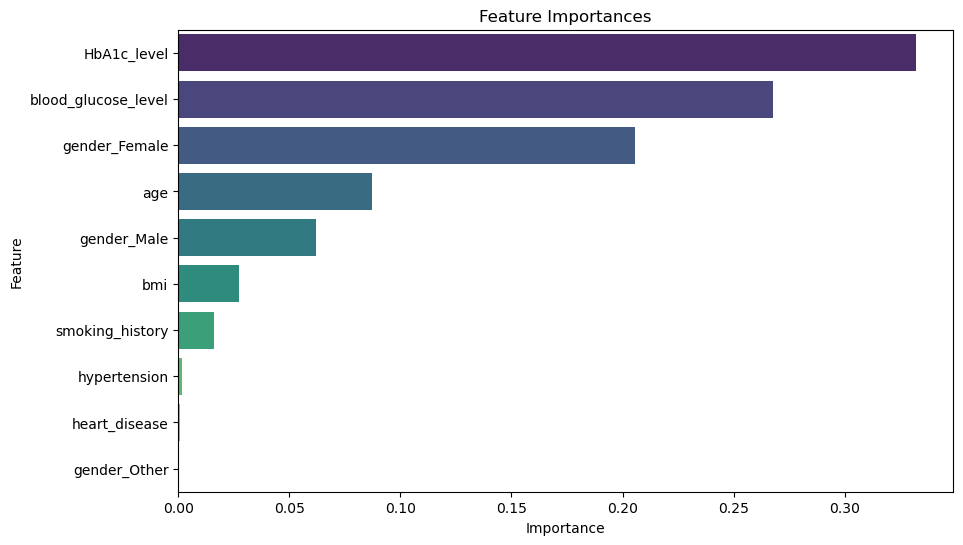

In [18]:
# Get feature importances from the XGBoost model
importance_2 = xgb.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance_2})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importance for the XGBoost Model:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In the XGBoost model, the feature HbA1c_level emerged as the most influential, with an importance score of 0.332, indicating it has the highest impact on the model’s decisions. Following that, blood_glucose_level and gender_Female also play significant roles with importance scores of 0.268 and 0.205, respectively. Other features like age and gender_Male have moderate influence, while factors such as smoking_history, hypertension, and heart_disease contribute minimally to the predictions. Notably, gender_Other has no impact in this model, as indicated by an importance score of 0.

### Tuning Hyperparameters

In [41]:
# Parameter grid for the Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_decision_model = grid_search.best_estimator_

dt_y_pred = best_decision_model.predict(X_test)

dt_model.fit(X_train,y_train)
print('Best Parameters using grid search: \n', 
      best_params)
print("Test Accuracy:", accuracy_score(dt_y_pred,y_test))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test Accuracy: 0.9328824300033514


In [14]:
# Parameter grid for the Random Forest
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [6,7,8,9,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2],
               'min_samples_split': [1, 2],
               'n_estimators': [100,101,102]}

# RandomSearch to find the best hyperparameters
model = RandomizedSearchCV(estimator = rf, param_distributions = random_search, n_iter = 100, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)
print('Best Parameters using random search: \n', 
      model.best_params_)
accuracy = model.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best Parameters using random search: 
 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.9413825671023368


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200],
    'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5]
}

model = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, 
                           cv=4, verbose=1, random_state=42, n_jobs=-1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the best parameters and accuracy
print('Best Parameters using random search: \n', model.best_params_)
accuracy = model.best_estimator_.score(X_test, y_test)
print("Test Accuracy:", accuracy)




Fitting 4 folds for each of 100 candidates, totalling 400 fits
Best Parameters using random search: 
 {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Test Accuracy: 0.9780032294427687


## Conclusion

### Comparison of algorithms and its accuracy

#### Naive Bayes:
Accuracy: 0.8182
The Naive Bayes classifier is relatively simple and efficient, but its accuracy in this case is lower compared to other algorithms.
#### Decision Tree:
Accuracy: 0.8462
The Decision Tree classifier provides better accuracy than Naive Bayes. It's a versatile and easy-to-interpret algorithm.
#### Random Forest:
Accuracy: 0.9174
The Random Forest classifier offers a notable improvement in accuracy. This ensemble method uses multiple decision trees and aggregates their predictions, resulting in more robust performance.
#### XGBoost:
Accuracy: 0.9686
The XGBoost classifier provides a significant boost in accuracy. This gradient boosting method builds multiple trees sequentially, optimizing their performance with each iteration, which enhances robustness and predictive power.
#### Decision Tree after Hyperparameter Tuning:
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Test Accuracy: 0.9329
Hyperparameter tuning of the Decision Tree using grid search enhances the model's performance, increasing accuracy significantly.
#### Random Forest after Hyperparameter Tuning:
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.9413
Tuning the Random Forest model undortunately decreases accuracy, suggesting overfitting or underfitting due to suboptimal parameter selection.
#### XGBoost after Hyperparameter Tuning:
Best Parameters using random search: 
 {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
Test Accuracy: 0.9780
In summary, the hyperparameter-tuned XGBoost model demonstrates the best accuracy, making it the most reliable choice for this task.

## Conclusion summary

The overall conclusion of the diabetes prediction project can be summarized as follows:

Algorithm Performance: <br>
Different machine learning algorithms were compared, including Naive Bayes, Decision Tree, XGBoost, and Random Forest.
XGBoost consistently outperformed other algorithms in terms of accuracy, demonstrating its robustness and effectiveness in handling complex data. <br>
Impact of Hyperparameter Tuning:<br>
Hyperparameter tuning significantly improved the performance of  the Decision Tree, XGBoost and Random Forest models.
Using grid search and random search methods, optimized parameters were identified for these models, leading to higher accuracy.<br>
Best Model:<br>
The best-performing model was the XGBoost model after hyperparameter tuning.
With an accuracy of 0.9780, it achieved the highest performance among all models tested.<br>
Practical Implications:<br>
The project demonstrates the importance of selecting the right algorithm and optimizing its parameters for accurate diabetes prediction.
The best model can be used to assist in early diagnosis and decision-making in medical contexts.<br>
Future Work:<br>
Further research could involve exploring additional features or advanced models for potential improvements in performance.
Continuous monitoring and updating of the model as new data becomes available will ensure sustained reliability.<br>
In conclusion, the project successfully identified an effective model for diabetes prediction, with the hyperparameter-tuned Random Forest model providing the highest accuracy. This model can be used as a valuable tool in healthcare to support early diagnosis and treatment planning for diabetes patients.

In [24]:
import pickle
with open('trainedfinalmodel.pkl', 'wb') as file:
        pickle.dump(model.best_estimator_, file)

In [25]:
from IPython.display import FileLink

# Provide a link to download the file
FileLink('trainedfinalmodel.pkl')


C:\Users\Keerthana\Downloads\trainedfinalmodel.pkl